*On this homework assignment, I worked in collaboration with other students in the ML course.*

# Part 1: Regression on California Test Scores
## 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

In [1]:
# import data
import numpy as np
import pandas as pd 
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
data.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [2]:
# drop 'readscr' and 'mathscr' variables 
data = data.iloc[:, 1:] # drop first column 'Unnamed'
data.drop(["district","distcod","county","grspan","readscr", "mathscr"], axis = 1, inplace = True) # drop categorical variables and 'readscr' and 'math
data.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


## 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

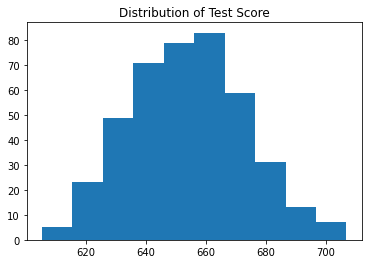

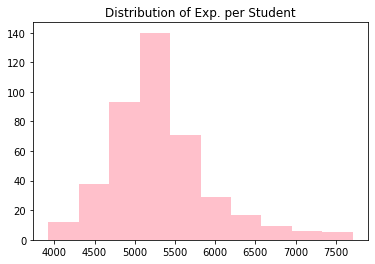

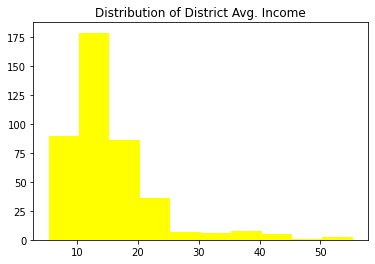

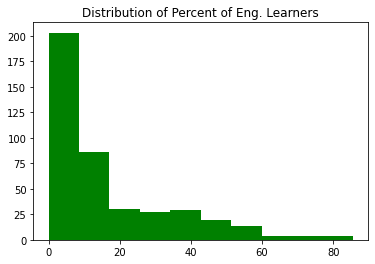

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

# target feature distribution
plt.hist(data['testscr'])
plt.title('Distribution of Test Score')
plt.show()

# explanatory variable 1: expenditure per student
plt.hist(data['expnstu'], color = "pink")
plt.title('Distribution of Exp. per Student')
plt.show()

# explanatory variable 2: district avg income
plt.hist(data['avginc'], color = "yellow")
plt.title('Distribution of District Avg. Income')
plt.show()

# explanatory variable 3: percent of english learner
plt.hist(data['elpct'], color = "green")
plt.title('Distribution of Percent of Eng. Learners')
plt.show()

## 1.2 Visualize the dependency of the target on each feature from 1.1.

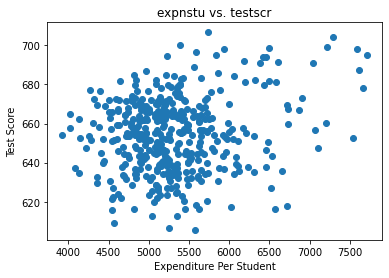

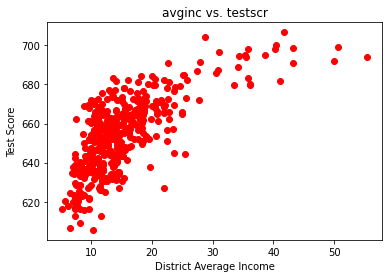

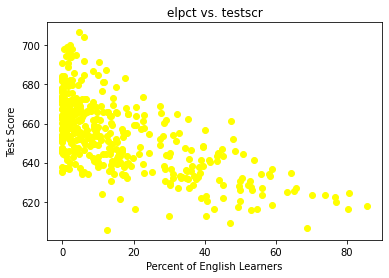

In [4]:
# expnstu vs. testscr
x_variable1 = data['expnstu']
y_variable = data['testscr']
plt.scatter(x_variable1, y_variable)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Test Score')
plt.title('expnstu vs. testscr')
plt.show()

# avginc vs. testscr
x_variable2 = data['avginc']
plt.scatter(x_variable2, y_variable, color = "red")
plt.xlabel('District Average Income')
plt.ylabel('Test Score')
plt.title('avginc vs. testscr')
plt.show()

# elpct vs. testscr 
x_variable3 = data['elpct']
plt.scatter(x_variable3, y_variable, color = "yellow")
plt.title('elpct vs. testscr')
plt.xlabel('Percent of English Learners')
plt.ylabel('Test Score')
plt.show()

## 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

### K Nearest Neighbors

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# set up data for train, test, split
y = data['testscr']
X = data.loc[:, data.columns != 'testscr'] # get rid of y data 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


# evaluate KNN for regression 
knn = KNeighborsRegressor(n_neighbors=5) # k = 5
knn.fit(X_train, y_train) # fit objects on training data 
knn.score(X_test, y_test)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.08


### KNN with Standard Scaler


In [6]:
# preprocess by scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
scaler = StandardScaler().fit(X_train)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.score(X_test, y_test)
print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

accuracy: 0.73


**Standard Scaler helps KNN Regression by a lot**

### Linear Regression (OLS)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_)) # look at coefficient of linear regression
print("lr.intercept_: {}".format(lr.intercept_)) # intercept of linear regression

# Scoring LR training data
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 1.23265852e-03 -3.24527985e-02 -8.83598155e-02 -3.81931221e-01
  3.30043134e-03  5.80342195e+00  2.00663899e-03 -2.59144037e-01
  5.44223554e-01 -2.14288402e-01]
lr.intercept_: 661.1394147432453
Training set score: 0.83
Test set score: 0.75


### Linear Regression with Standard Scaler


In [9]:
lr.fit(X_train_scaled, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))

lr.coef_: [  4.66984614  -5.98124212  -0.99043965 -10.2064311    1.42681763
   0.38292197   1.20358627  -0.48441275   3.76970421  -4.01397992]
lr.intercept_: 653.5317460317458
Training set score: 0.83
Test set score: 0.75


**Linear Regression essentially same score with Standard Scaler**

### Ridge Regression

In [10]:

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.83
Test set score: 0.75


### Ridge with Standard Scaler


In [11]:
ridge_scaled = Ridge().fit(X_train_scaled, y_train) 
print("Training set score: {:.2f}".format(ridge_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge_scaled.score(X_test_scaled, y_test)))

Training set score: 0.83
Test set score: 0.75


**Ridge essentially same score with Standard Scaler**

### Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter=1000000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 
print("lasso.coef_: {}".format(lasso.coef_))

Training set score: 0.83
Test set score: 0.74
Number of features used: 8
lasso.coef_: [ 2.08917447e-04 -1.41386624e-02 -8.01345679e-02 -3.95156425e-01
  4.20224112e-03  0.00000000e+00  2.67985555e-03 -0.00000000e+00
  4.96631492e-01 -2.09579314e-01]


### Lasso Regression with Standard Scaler


In [13]:
lasso_scaled = Lasso().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_scaled.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso_scaled.coef_ != 0))) 
print("lasso.coef_: {}".format(lasso_scaled.coef_))

Training set score: 0.82
Test set score: 0.74
Number of features used: 5
lasso.coef_: [ -0.          -0.          -0.         -10.87086307  -0.
   0.14348503   0.5172354   -0.           3.45950003  -3.19671056]


**Standard Scaler does not improve Lasso**

### Cross Validation Scores

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(lr, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(lr, X_train, y_train, cv=10, scoring = "r2")))

cross_val_score(knn, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = "r2")))

cross_val_score(ridge, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(ridge, X_train, y_train, cv=10, scoring = "r2")))

cross_val_score(lasso, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(lasso, X_train, y_train, cv=10, scoring = "r2")))



0.8067280808890971
-0.08759767215631972
0.8078853332148264
0.8100326986374515


### CV with Standard Scaler

In [15]:
cross_val_score(lr, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring = "r2")))

cross_val_score(knn, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring = "r2")))

cross_val_score(ridge, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(ridge, X_train_scaled, y_train, cv=10, scoring = "r2")))

cross_val_score(lasso, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(lasso, X_train_scaled, y_train, cv=10, scoring = "r2")))

0.8067280808890966
0.7311735784400037
0.8072717407920242
0.8045653891852668


**Two best models are Linear Regression and Ridge. The Linear cross validation score is .806 while the Ridge score is .807.**

---



## 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Tuning KNN 

knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
print(knn_pipe.steps)

param_grid = {'kneighborsregressor__n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsregressor', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform'))]
best mean cross-validation score: 0.764
best parameters: {'kneighborsregressor__n_neighbors': 13}
test-set score: 0.706


In [17]:
# Scaled and Tuned KNN 
param_grid = {'kneighborsregressor__n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.764
best parameters: {'kneighborsregressor__n_neighbors': 13}
test-set score: 0.706


**Tuning parameters using GridSearchCV improves KNN**

In [19]:
# Ridge Gridsearch CV
param_grid = {'alpha': [1, 1000], 'max_iter': [1, 100000]}
grid = GridSearchCV(Ridge(), param_grid, cv = 15)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: 0.804
best parameters: {'alpha': 1000, 'max_iter': 1}
test-set score: 0.743


In [21]:
# Tuning w scaled 
param_grid = {'alpha': [1, 1000], 'max_iter': [1, 100000]}
grid = GridSearchCV(Ridge(), param_grid, cv = 15)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.802
best parameters: {'alpha': 1, 'max_iter': 1}
test-set score: 0.748


In [22]:
# changing Ridge alpha
ridge_tuned = Ridge(alpha = 10).fit(X_train, y_train)
print("Training set score: {:.5f}".format(ridge_tuned.score(X_train,y_train)))
print("Test set score: {:.5f}".format(ridge_tuned.score(X_test, y_test))) 


Training set score: 0.83206
Test set score: 0.74455


In [23]:
# Ridge scaled and tuned
ridge_tuned2 = Ridge(alpha = 10).fit(X_train_scaled, y_train)
print("Training set score: {:.5f}".format(ridge_tuned2.score(X_train_scaled,y_train)))
print("Test set score: {:.5f}".format(ridge_tuned2.score(X_test_scaled, y_test))) 

Training set score: 0.83143
Test set score: 0.74920


**Tuning by increasing alpha improves Ridge score**

In [28]:
# Lasso Gridsearch CV 
param_grid = {'alpha': [1, 1000], 'max_iter': [1, 100000000]}
grid = GridSearchCV(Lasso(), param_grid, cv = 15)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17377.591997530857, tolerance: 10.10010244131078
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17251.241184356182, tolerance: 10.028541312714669
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16666.297541823027, tolerance: 9.875836323249395
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17302.36

best mean cross-validation score: 0.804
best parameters: {'alpha': 1, 'max_iter': 100000000}
test-set score: 0.744


In [29]:
# Tuning Lasso with scaled
param_grid = {'alpha': [1, 1000], 'max_iter': [1, 100000]}
grid = GridSearchCV(Lasso(), param_grid, cv = 15)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21777.504309344717, tolerance: 10.10010244131078
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21379.738572402115, tolerance: 10.028541312714669
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20823.64312036013, tolerance: 9.875836323249395
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21886.050

best mean cross-validation score: 0.798
best parameters: {'alpha': 1, 'max_iter': 100000}
test-set score: 0.742


In [ ]:
# Lasso alpha = 10
lasso_tuned = Lasso(alpha = 10, max_iter = 100).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso_tuned.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso_tuned.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso_tuned.coef_ != 0)))

Training set score: 0.82
Test set score: 0.72
Number of features used: 6


In [ ]:
# Lasso scaled and tuned
lasso_tuned2 = Lasso(alpha = 10, max_iter = 100).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso_tuned2.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso_tuned2.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso_tuned2.coef_ != 0)))

Training set score: 0.49
Test set score: 0.43
Number of features used: 1


**Tuning by increasing alpha improves Lasso score, but not scaled**

## 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?


In [ ]:
lr.coef_

array([  4.66984614,  -5.98124212,  -0.99043965, -10.2064311 ,
         1.42681763,   0.38292197,   1.20358627,  -0.48441275,
         3.76970421,  -4.01397992])

In [ ]:
lasso_tuned.coef_

array([-0.00055531, -0.        , -0.        , -0.51123605,  0.00480717,
        0.        ,  0.00374504, -0.        ,  0.10154106, -0.12938137])

In [ ]:
ridge_tuned2.coef_

array([-0.14706884, -0.65639799, -1.47292229, -9.27650008,  0.9048331 ,
        0.47246612,  1.18568776, -0.33469443,  3.93263723, -4.29797339])

Tuning the Lasso regression improves the model score, but both tuning and scaling the Lasso regression does not help the model. The tuned Lasso model zeroes out 4 of the coefficients. The best two linear models are Linear Regression and Ridge regression. The coefficients for both of these linear models relatively agree on the important features.

## 1.6 Discuss which final model you would choose to predict new data
The Linear Regression model and Ridge Regression model produce similar scores. However, the cross validation score indicates that the Ridge Regression model is slightly better. Therefore, I would use the Ridge model to predict new data

# Part 2: Classification on red and white wine characteristics




## Load in datasets

In [ ]:
# load red wine data
red_wine = pd.read_csv("winequality-red.csv", sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine['winetype'] = 1
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
white_wine = pd.read_csv("winequality-white.csv", sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_wine['winetype'] = 0
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [ ]:
# merge datasets
wine = pd.concat([red_wine, white_wine], axis = 0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wine.shape # check

(6497, 13)

In [ ]:
#check variable names
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype'],
      dtype='object')

## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature. 

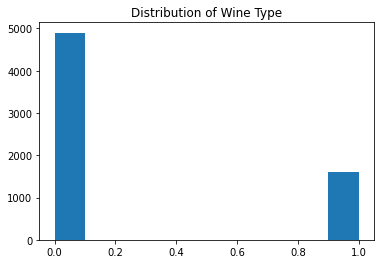

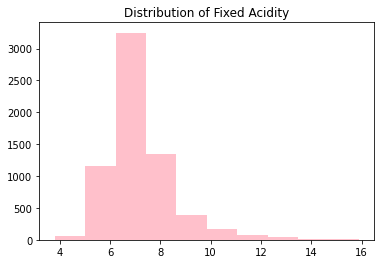

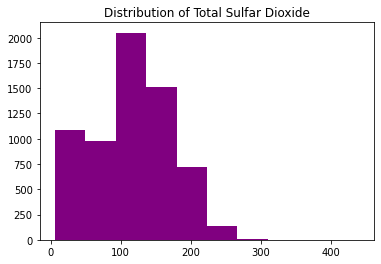

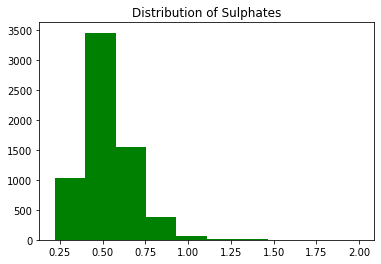

In [ ]:
# distribution of winetype
plt.hist(wine['winetype'])
plt.title('Distribution of Wine Type')
plt.show()

# distribution of fixed acidity
plt.hist(wine['fixed acidity'], color = 'pink')
plt.title('Distribution of Fixed Acidity')
plt.show()

# distribution of total sulfur dioxide
plt.hist(wine['total sulfur dioxide'], color = 'purple')
plt.title('Distribution of Total Sulfar Dioxide')
plt.show()

# distribution of sulphates
plt.hist(wine['sulphates'], color = 'green')
plt.title('Distribution of Sulphates')
plt.show()


## 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [ ]:
# set up data for train, test, split
y = wine['winetype']
X = wine.loc[:, wine.columns != 'winetype'] # get rid of y data 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e90, max_iter=10000000).fit(X_train, y_train) # no penalty
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print("logreg.coef_: {}".format(logreg.coef_))


Training set score: 0.994
Test set score: 0.990
logreg.coef_: [[-2.35348603e-01  7.85915421e+00 -3.03793433e+00 -1.15583324e+00
   2.46089840e+01  8.14844577e-02 -6.80425322e-02  1.87083236e+03
  -1.58012105e+00  4.71347838e+00  1.81862744e+00  3.94731195e-01]]


### Standard Scaler

In [ ]:
# preprocess by scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()
scaler = StandardScaler().fit(X_train)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression with Standard Scaler

In [ ]:
logreg = LogisticRegression(C=1e90, max_iter=10000000).fit(X_train_scaled, y_train) # no penalty
print("Training set score: {:.3f}".format(logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))
print("logreg.coef_: {}".format(logreg.coef_))

Training set score: 0.994
Test set score: 0.990
logreg.coef_: [[-0.2844026   1.29001119 -0.43946222 -5.44851597  0.88402537  1.45639604
  -3.85099787  5.56095625 -0.22759945  0.6994337   2.14466642  0.34360539]]


**Standard Scaler keeps Logistic Regression score same**



## 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".

### Penalized Logistic Regression

In [ ]:
penlogreg = LogisticRegression(C=5, penalty='l2', max_iter=100000000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(penlogreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(penlogreg.score(X_test, y_test)))
print("penlogreg .coef_: {}".format(penlogreg .coef_))

Training set score: 0.987
Test set score: 0.985
penlogreg .coef_: [[ 1.30188016e+00  1.12694121e+01 -6.19192944e-01 -1.20065036e-01
   8.70395224e+00  4.90370070e-02 -6.56082530e-02  6.83004841e-01
   7.50448881e+00  8.89405511e+00 -5.35431414e-01 -8.83135546e-03]]


### Penalized Logistic Regression with Standard Scaler

In [ ]:
penlogreg = LogisticRegression(C=5, penalty='l2', max_iter=100000000).fit(X_train_scaled, y_train) # Ridge penalty
print("Training set score: {:.3f}".format(penlogreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(penlogreg.score(X_test_scaled, y_test)))
print("penlogreg .coef_: {}".format(penlogreg .coef_))

Training set score: 0.995
Test set score: 0.990
penlogreg .coef_: [[ 6.37338316e-03  1.33647541e+00 -3.96993328e-01 -4.67244261e+00
   8.99431394e-01  1.22685967e+00 -3.60588399e+00  4.67605142e+00
   1.07075695e-03  7.66779206e-01  1.71663936e+00  3.19741032e-01]]


**Standard Scaler improves Penalized Logistic Regression**

### K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k = 5
knn.fit(X_train, y_train) # fit objects on training data 
knn.score(X_test, y_test)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.94


### KNN with Standard Scaler

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) # k = 5
knn.fit(X_train_scaled, y_train) # fit objects on training data 
knn.score(X_test_scaled, y_test)
print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

accuracy: 0.99


**Standard Scaler improves KNN from .94 to .99**

###Cross Validation Scores

In [ ]:
# with accuracy
cross_val_score(logreg, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(logreg, X_train, y_train, cv=10, scoring = "accuracy")))
cross_val_score(penlogreg, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(penlogreg, X_train, y_train, cv=10, scoring = "accuracy")))
cross_val_score(knn, X_train, y_train, cv = 10)
print(np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")))



0.9928148247887704
0.9868646278654862
0.9406819099875451


**Log Regression and Penalized Log Regression result in the two best CV scores of .993 and .987**

In [ ]:
# accuracy scaled
cross_val_score(logreg, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(logreg, X_train_scaled, y_train, cv=10, scoring = "accuracy")))
cross_val_score(penlogreg, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(penlogreg, X_train_scaled, y_train, cv=10, scoring = "accuracy")))
cross_val_score(knn, X_train_scaled, y_train, cv = 10)
print(np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring = "accuracy")))

0.9944575352610496
0.9942521964520147
0.9926103275322316


**CV scores with 'accuracy' improved all models once scaled. The two best CV scores are still Log Regression and Penalized Log Regression of .994**

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [ ]:
# Tuning KNN Classifier

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
print(knn_pipe.steps)

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'))]
best mean cross-validation score: 0.995
best parameters: {'kneighborsclassifier__n_neighbors': 1}
test-set score: 0.991


In [ ]:
# KNN Classifier Tuned and Scaled
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.995
best parameters: {'kneighborsclassifier__n_neighbors': 1}
test-set score: 0.991


**Tuning improves KNN Classifier model, same results Tuned and Scaled**

### Tuning C Parameter using GridSearchCV for Log Reg

In [ ]:
param_grid = {"C": [.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=100000), param_grid=param_grid, cv=15)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.990
best parameters: {'C': 100}
test-set score: 0.986


In [ ]:
# scaled
param_grid = {"C": [.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=100000), param_grid = param_grid, cv=15)
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.995
best parameters: {'C': 100}
test-set score: 0.990


**Tuning parameters improved the CV score of Log Reg**

### Tuning Penalized Logistic Regression

In [ ]:
param_grid = {"C": [.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty="l2", max_iter=100000), param_grid=param_grid, cv=15)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.990
best parameters: {'C': 100}
test-set score: 0.986


In [ ]:
# scaled
param_grid = {"C": [.001, .01, .1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(penalty="l2", max_iter=100000), param_grid=param_grid, cv=15)
grid.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.995
best parameters: {'C': 100}
test-set score: 0.990


**Tuning parameters also improved the CV score of Penalized Log Reg**

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from statistics import mean 

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
print("KFold:\n{}".format( 
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold)))) 
print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold))))

KFold:
0.9392445637866582
StratifiedKFold:
0.9398631074606434


In [ ]:
# scaled
print("KFold:\n{}".format( 
mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=kfold))))
print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=skfold))))

KFold:
0.9921998631074607
StratifiedKFold:
0.993637234770705


In [ ]:
# change random seed and split 
kfold2 = KFold(n_splits=10)
skfold2 = StratifiedKFold(n_splits=10, shuffle=False)
print("KFold:\n{}".format( 
mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold2)))) 
print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=skfold2))))

KFold:
0.9404774127310062
StratifiedKFold:
0.940681909987545


In [ ]:
# changes with scaled data
print("KFold:\n{}".format( 
mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=kfold2)))) 
print("StratifiedKFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train_scaled, y_train, cv=skfold2))))

KFold:
0.9926103275322314
StratifiedKFold:
0.9926103275322314


**Changing random seed of the shuffling and random state of the split does not change the scoring by much. The scoring is essentially the same with scaled data.**

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [ ]:
logreg.coef_

array([[-0.2844026 ,  1.29001119, -0.43946222, -5.44851597,  0.88402537,
         1.45639604, -3.85099787,  5.56095625, -0.22759945,  0.6994337 ,
         2.14466642,  0.34360539]])

In [ ]:
penlogreg.coef_

array([[ 6.37338316e-03,  1.33647541e+00, -3.96993328e-01,
        -4.67244261e+00,  8.99431394e-01,  1.22685967e+00,
        -3.60588399e+00,  4.67605142e+00,  1.07075695e-03,
         7.66779206e-01,  1.71663936e+00,  3.19741032e-01]])

The coefficients on the Logistic Regression and Penalized Logistic Regression are similar, but do not exactly align/agree on all features. Both models essentially yield the same scores. However, to predict new data I would choose the Penalized Logistic Regression model because the coefficients indicate that the odds of predicting correct new data would be higher for the Penalized Logistic Regression model.